In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import joblib

/Users/omike24/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/omike24/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Read dataset 

re_df = pd.read_csv("Real estate.csv")
re_df = re_df.iloc[:, 1:]
re_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Data Exploration

In [3]:
# Removing the first 2 characters including the space from each column name

re_df.columns = [col[2:] for col in re_df.columns]

In [4]:
# Remove space in the column names 

re_df.columns = [col.strip() for col in re_df.columns]

In [5]:
re_df = re_df.rename(columns={
    'distance to the nearest MRT station': 'dist_to_the_nearest_MRT_station',
    'number of convenience stores': 'num_convenient_stores',
    'house price of unit area': 'price_of_unit_area'
})

In [6]:
re_df.columns = re_df.columns.str.replace(' ', '_')

In [7]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   transaction_date                 414 non-null    float64
 1   house_age                        414 non-null    float64
 2   dist_to_the_nearest_MRT_station  414 non-null    float64
 3   num_convenient_stores            414 non-null    int64  
 4   latitude                         414 non-null    float64
 5   longitude                        414 non-null    float64
 6   price_of_unit_area               414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [8]:
re_df.columns.to_list()

['transaction_date',
 'house_age',
 'dist_to_the_nearest_MRT_station',
 'num_convenient_stores',
 'latitude',
 'longitude',
 'price_of_unit_area']

In [9]:
re_df.describe()

,transaction_date,house_age,dist_to_the_nearest_MRT_station,num_convenient_stores,latitude,longitude,price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Check the Colinearlity

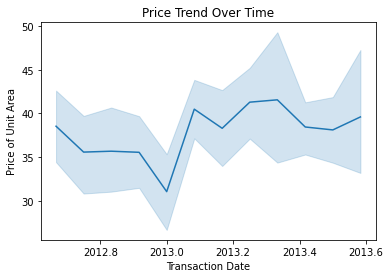

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=re_df['transaction_date'], y=re_df['price_of_unit_area'])

plt.xlabel('Transaction Date')
plt.ylabel('Price of Unit Area')
plt.title('Price Trend Over Time')

plt.show()


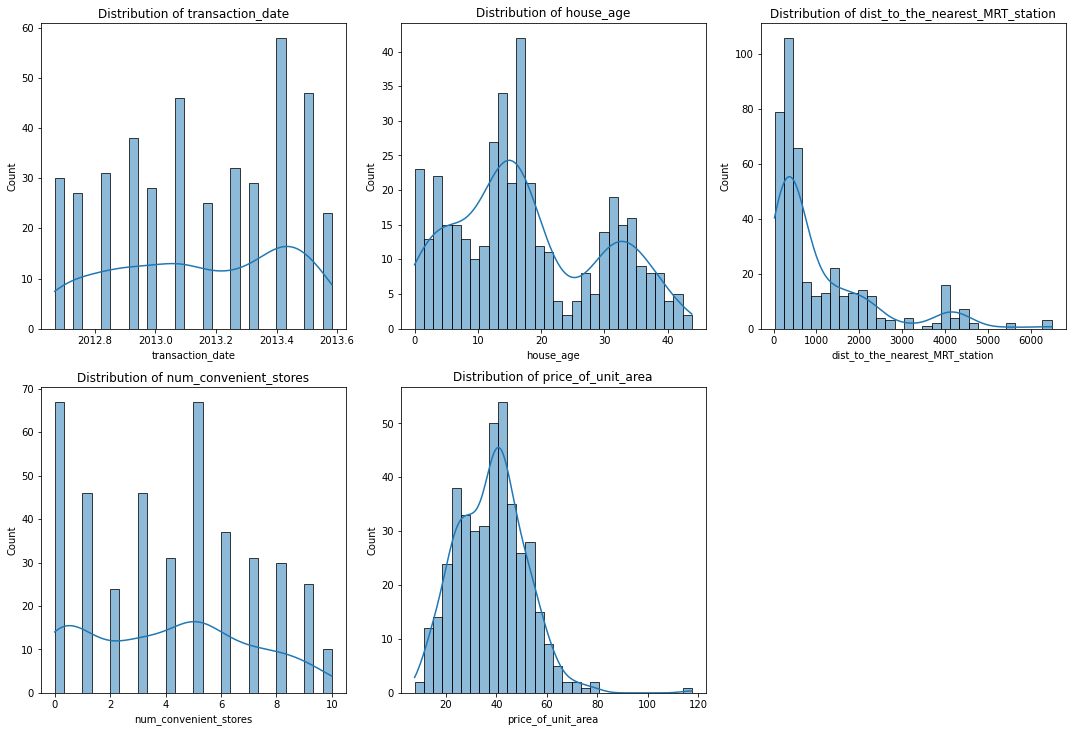

In [11]:
# Columns to exclude 
exclude_cols = re_df[['latitude', 'longitude']]

# Extract numeric cols
numeric_cols = re_df.select_dtypes(include=['number']).drop(columns = exclude_cols)

# Determine the number of columns and rows
num_rows = len(numeric_cols.columns)
num_cols = (numeric_cols//3) + (numeric_cols % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each numeric columns

for i, col in enumerate(numeric_cols.columns):
    sns.histplot(re_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete unused axes

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

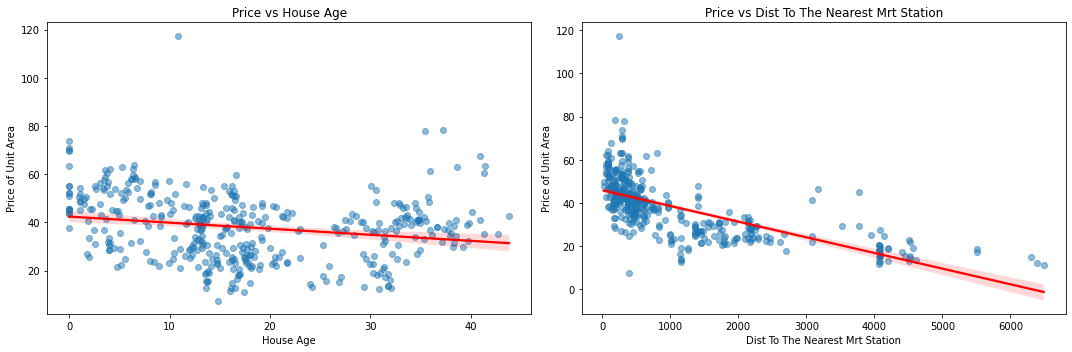

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
axes = axes.flatten() 

# List of variables to plot
variables = ["house_age", "dist_to_the_nearest_MRT_station"]

# Iterate and plot on respective axes
for i, var in enumerate(variables):
    sns.regplot(x=re_df[var], y=re_df["price_of_unit_area"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[i])
    axes[i].set_xlabel(var.replace("_", " ").title())  # Format axis label
    axes[i].set_ylabel("Price of Unit Area")
    axes[i].set_title(f"Price vs {var.replace('_', ' ').title()}")



# Adjust layout
plt.tight_layout()
plt.show()


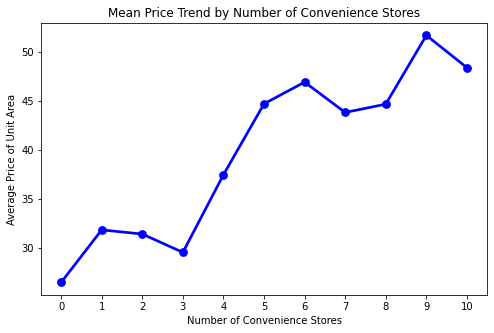

In [13]:
# Calculate mean price for each store count
mean_prices = re_df.groupby("num_convenient_stores")["price_of_unit_area"].mean()

# Plot the mean trend
plt.figure(figsize=(8, 5))
sns.pointplot(x=mean_prices.index, y=mean_prices.values, color="blue", markers="o")

plt.xlabel("Number of Convenience Stores")
plt.ylabel("Average Price of Unit Area")
plt.title("Mean Price Trend by Number of Convenience Stores")

plt.show()



**P.S.** Because the data is numeric and discrete which we had to create a groupby to show the mean to check for linearity. It is not perfect but shows a positive relationship between the two variables.

> - As the number of convenient stores increases the price of unit area increases.

### Check for Multicollinearity

<Axes: >

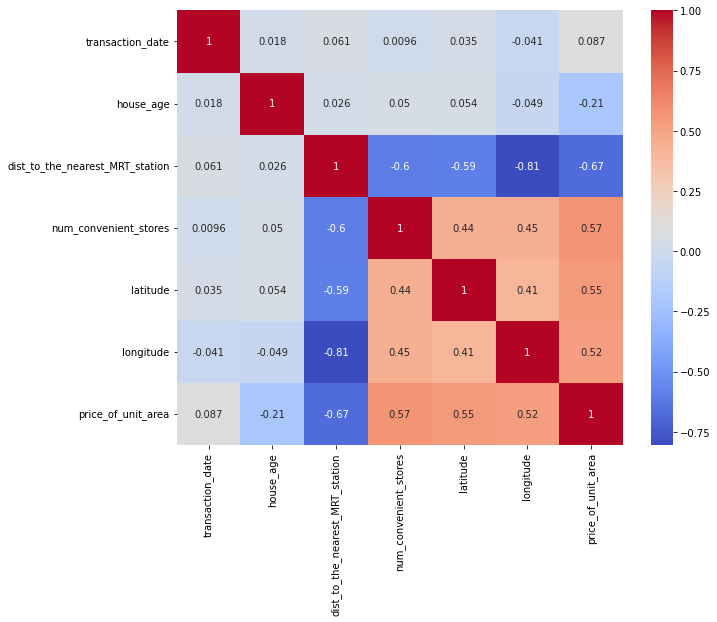

In [14]:
correlation_matrix = re_df.corr()

plt.figure(figsize = (10,8))

sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)


Our target variable is __price_of_unit_area__, let's take a look at the key relationship with it:

> - As the age of a house (house_age) increases by 1 unit, the price of a house (price_of_unit_area) decreases __0.21__. Older units tend to have lower prices.

> - As the the distance to a MRT station increases by 1 unit, the price of a house decrease by __0.67__. The further you are from a subway station for example tend to decrease the price of a unit.

> - As the number of convenient stores increase by 1 unit, the price of a house increases by __0.57__. the less convenient stores around a unit the less expensive the unit area will be.

In [15]:
re_df.shape

(414, 7)

### Linear Regression

In [16]:
# Define Dependent (X) amd independent variables (y)

X = re_df[['dist_to_the_nearest_MRT_station', 'num_convenient_stores', 'house_age']]
y = re_df[['price_of_unit_area']]

# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Get model coefficients & intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: [43.51488014]
Coefficients: [[-0.00549834  1.24734248 -0.25840543]]


- The larger the distance to the nearest MRT station, the price of a unit area is predicted to decrease by -$0.005. 

- The increase in the number of convenient stores, the price of a unit area is predicted to decrease by $1.24.

- The older the house, the price of a unit area is predicted to decrease by -$0.258.

- The price of a unit area when the distance to a MRT station is 0, the number of convenient is 0 and the age of a house is 0 the price of a house is $43.51.

In [18]:
# Predict prices on test set
y_pred = model.predict(X_test)

In [19]:
# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R-squared: 0.65
Mean Squared Error: 58.89


In [20]:
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [23]:
def predict_price():
    print("Enter values for prediction:")
    dist_to_MRT = float(input("Distance to nearest MRT station: "))
    num_stores = int(input("Number of convenient stores: "))
    house_age = float(input("House age: "))

    # Create an input array
    input_data = np.array([[dist_to_MRT, num_stores, house_age]])

    # Make prediction
    predicted_price = model.predict(input_data)

    # Print result
    print(f"\nPredicted Price of Unit Area: {float(predicted_price[0]):.2f}")



# Run the prediction function
predict_price()

Enter values for prediction:
Distance to nearest MRT station: 3
Number of convenient stores: 5
House age: 8

Predicted Price of Unit Area: 47.67


/Users/omike24/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/3f/7yyndr2s1xsd15b1kh2vc2k00000gn/T/ipykernel_35896/2326314059.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"\nPredicted Price of Unit Area: {float(predicted_price[0]):.2f}")


**streamlit run app.py**


In [24]:
# Validate that the loaded object has a 'predict' method
if not hasattr(model, "predict"):
    raise ValueError("Uploaded file is not a valid scikit-learn ML model.")


In [26]:
import pickle

### Using Random Forest 

In [27]:
re_df.head()

,transaction_date,house_age,dist_to_the_nearest_MRT_station,num_convenient_stores,latitude,longitude,price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


<Axes: xlabel='price_of_unit_area'>

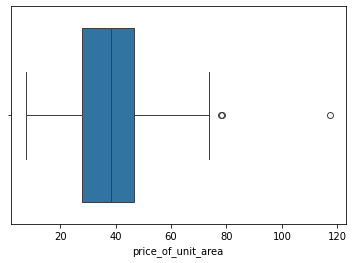

In [28]:
sns.boxplot(x=re_df['price_of_unit_area'])

In [31]:
# Define Dependent (X) amd independent variables (y)

X = re_df[['dist_to_the_nearest_MRT_station', 'num_convenient_stores', 'house_age']]
y = re_df[['price_of_unit_area']]

# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

/Users/omike24/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [33]:
# Evaluation

y_pred = rf_model.predict(X_test)
print("MAE or Mean Absoluet Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

MAE or Mean Absoluet Error: 4.466381487856186
R² Score: 0.7682468541574858
RMSE: 38.878848538304354


### 📊 Model Performance Interpretation

- **MAE (Mean Absolute Error)** is **excellent**.  
  The average price of a unit area is approximately **$38**, and the MAE is **$4.47**.  
  This means our model’s predictions are, on average, off by **only $4.47**, which is about **11.7% of the mean price** — a strong indicator of accurate performance across most of the data.

- **R² Score** shows a **strong model fit**.  
  Our Random Forest model achieved an R² of **0.768**, meaning it explains **76.8% of the variance** in housing prices.  
  This is a significant improvement over our Linear Regression model, which had a lower R² — showing that Random Forest captures non-linear relationships more effectively.

- **RMSE (Root Mean Squared Error)** appears **inflated**, but that’s expected.  
  Since RMSE penalizes larger errors more heavily, it is **sensitive to outliers** — and our dataset contains a few extreme price values.  
  Despite this, the MAE confirms that the model performs very well on the majority of predictions.


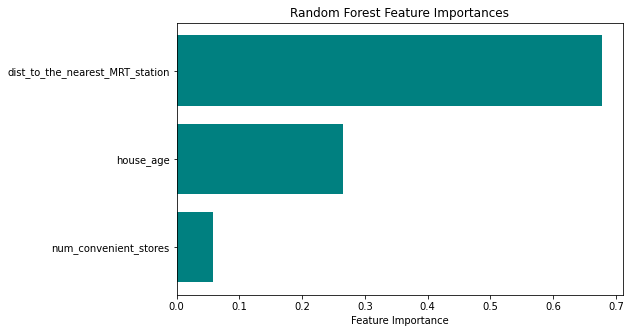

In [35]:
# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()

### 🌲 Random Forest Feature Importance Interpretation

The bar chart above shows the relative importance of each feature in predicting the **price of unit area** using the Random Forest model. Here's what it tells us:

- **`dist_to_the_nearest_MRT_station`** is by far the most influential feature, contributing the most to the model’s predictions.  
  This indicates that proximity to public transportation significantly impacts housing prices — the closer a property is to an MRT station, the higher its predicted price.

- **`house_age`** is moderately important.  
  While not as impactful as MRT distance, the age of the house still plays a meaningful role — older houses tend to have slightly lower prices.

- **`num_convenient_stores`** has very little influence on the model.  
  This suggests that the number of nearby convenience stores does not have a strong predictive effect on price, at least compared to the other two variables.

📌 **Conclusion:**  
If we are to focus on the most impactful factors when evaluating or investing in property, distance to MRT stations should be a top priority. The Random Forest model has effectively identified and ranked the drivers of housing price in this dataset.


In [36]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [37]:
# Function to take input and predict
def predict_price():
    print("Enter values for prediction:")
    dist_to_MRT = float(input("Distance to nearest MRT station: "))
    num_stores = int(input("Number of convenient stores: "))
    house_age = float(input("House age: "))

    # Create an input array
    input_data = np.array([[dist_to_MRT, num_stores, house_age]])

    # Make prediction
    predicted_price = rf_model.predict(input_data)
    
    print(f"\nPredicted Price of Unit Area: {predicted_price[0]:.2f}")

# Run the prediction function
predict_price()

Enter values for prediction:
Distance to nearest MRT station: 4
Number of convenient stores: 52
House age: 3

Predicted Price of Unit Area: 53.79


/Users/omike24/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
